In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
from network import Network
import numpy as np
import seaborn as sns
import pandas as pd
from config import Config, Globals
from data_generator import DataGenerator

### Init datasets

In [61]:
train, test, valid = DataGenerator.GetTrainTestValid()

In [62]:
n = Network(Config.layers)
n

[Layer - shape: (256, 100), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (100, 50), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (50, 4), f(a): None, activation: <class 'activation_functions.Sigmoid'>] Softmax: False L1: 0.0, L2: 0.0

### Train the network

In [63]:
train_acc, valid_acc = n.fit(train.x, train.y, valid=valid)
df_train = pd.DataFrame(train_acc, columns=['epoch', 'loss'])
df_valid = pd.DataFrame(valid_acc, columns=['epoch', 'loss'])


### Calculate test loss

In [66]:
score = 0
for x,y in zip(test.x, test.y):
    score += Globals.LOSS_FUNCION.f(y, n.predict(x))

score = score / len(test.x)

In [92]:

df = pd.DataFrame()
# df['epoch'] = df_train.epoch
df['Train Loss'] = df_train.loss
df['Validation Loss'] = df_valid.loss
df['Test Loss'] = np.nan
for i in range(5):
    df.loc[len(df.index)+i] = [np.nan, np.nan, score]


### Plot loss

<AxesSubplot:>

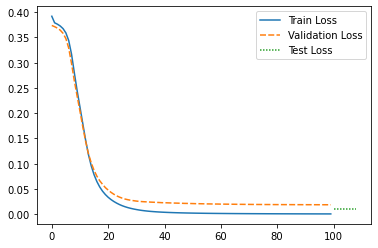

In [95]:
sns.lineplot(data=df )

### Test set accuracy

In [96]:
correct = 0
m = len(test.y)
for x,y in zip(test.x, test.y):

    pred = n.predict(x)
    correct += np.argmax(pred) == np.argmax(y)

    
print(f'{correct} / {m} correct. Accuracy {np.round(correct/m, 3)}')

50 / 50 correct. Accuracy 1.0
